In [1]:
import numpy as np
wordsList = np.load('training_data/wordsList.npy')
print('Loaded the word list !')
wordsList = wordsList.tolist()
wordsList = [word.decode('UTF-8') for word in wordsList]
wordVector = np.load('training_data/wordVectors.npy')
print('Loaded the word vectors !')

Loaded the word list !
Loaded the word vectors !


In [2]:
print(len(wordsList))
print(wordVector.shape)

400000
(400000, 50)


In [4]:
baseballIndex = wordsList.index('baseball')
wordVector[baseballIndex]

array([-1.9327  ,  1.0421  , -0.78515 ,  0.91033 ,  0.22711 , -0.62158 ,
       -1.6493  ,  0.07686 , -0.5868  ,  0.058831,  0.35628 ,  0.68916 ,
       -0.50598 ,  0.70473 ,  1.2664  , -0.40031 , -0.020687,  0.80863 ,
       -0.90566 , -0.074054, -0.87675 , -0.6291  , -0.12685 ,  0.11524 ,
       -0.55685 , -1.6826  , -0.26291 ,  0.22632 ,  0.713   , -1.0828  ,
        2.1231  ,  0.49869 ,  0.066711, -0.48226 , -0.17897 ,  0.47699 ,
        0.16384 ,  0.16537 , -0.11506 , -0.15962 , -0.94926 , -0.42833 ,
       -0.59457 ,  1.3566  , -0.27506 ,  0.19918 , -0.36008 ,  0.55667 ,
       -0.70315 ,  0.17157 ], dtype=float32)

In [5]:
import tensorflow as tf
maxSeqLength = 10
numDimensions = 300
firstSentence = np.zeros((maxSeqLength), dtype='int32')
firstSentence[0] = wordsList.index('i')
firstSentence[1] = wordsList.index('thought')
firstSentence[2] = wordsList.index('the')
firstSentence[3] = wordsList.index('movie')
firstSentence[4] = wordsList.index('was')
firstSentence[5] = wordsList.index('incredible')
firstSentence[6] = wordsList.index('and')
firstSentence[7] = wordsList.index('inspiring')
print(firstSentence.shape)
print(firstSentence)


/Users/macbook/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


(10,)
[    41    804 201534   1005     15   7446      5  13767      0      0]


In [6]:
with tf.Session() as sess:
    print(tf.nn.embedding_lookup(wordVector, firstSentence).eval().shape)

(10, 50)


In [7]:
from os import listdir
from os.path import isfile, join
positiveFiles = ['training_data/positiveReviews/' + f for f in listdir('training_data/positiveReviews/') \
                 if isfile(join('training_data/positiveReviews/', f))]
negativeFiles = ['training_data/negativeReviews/' + f for f in listdir('training_data/negativeReviews/') \
                 if isfile(join('training_data/negativeReviews/', f))]

In [10]:
numWords = []
for pf in positiveFiles:
    with open(pf, "r", encoding='UTF-8') as f:
        line  = f.readline()
        counter = len(line.split())
        numWords.append(counter)
print('Positive files finished !')

for nf in negativeFiles:
    with open(nf, "r", encoding='UTF-8') as f:
        line  = f.readline()
        counter = len(line.split())
        numWords.append(counter)
print('Negative files finished !')

numFiles = len(numWords)
print('The total number of files is', numFiles)
print('The total number of words in the files is', sum(numWords))
print('The average number of words in the files is', sum(numWords)/len(numWords))

Positive files finished !
Negative files finished !
The total number of files is 25000
The total number of words in the files is 5844680
The average number of words in the files is 233.7872


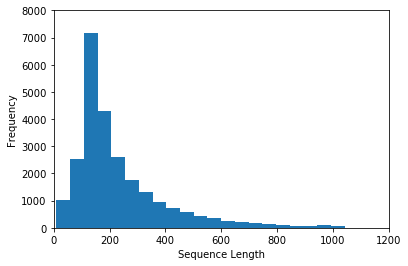

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(numWords, 50)
plt.xlabel("Sequence Length")
plt.ylabel("Frequency")
plt.axis([0, 1200, 0, 8000])
plt.show()

In [17]:
maxSeqLength = 250


In [37]:
fname = positiveFiles[100]
with open(fname) as f:
    for line in f:
        print(line)
        exit


Sure, it was cheesy and nonsensical and at times corny, but at least the filmmakers didn't try. While most TV movies border on the brink of mediocrity, this film actually has some redeeming qualities to it. The cinematography was pretty good for a TV film, and Viggo Mortensen displays shades of Aragorn in a film about a man who played by his own rules. Most of the flashback sequences were kind of cheesy, but the scene with the mountain lion was intense. I was kind of annoyed by Jason Priestly's role in the film as a rebellious shock-jock, but then again, it's a TV MOVIE! Despite all of the good things, the soundtrack was atrocious. However, it was nice to see Tucson, Arizona prominently featured in the film.


In [39]:
import re
strip_special_chars = re.compile("[^A-Za-z0-9 ]+")
def cleanSentence(string):
    string = string.lower().replace("<br />", " ")
    return re.sub(strip_special_chars, "", string.lower())


In [40]:
firstFile = np.zeros((maxSeqLength), dtype='int32')
with open(fname) as f:
    indexCounter = 0
    line = f.readline()
    cleanedLine = cleanSentence(line)
    split = cleanedLine.split()
    for word in split:
        if indexCounter < maxSeqLength:
            try:
                firstFile[indexCounter] = wordsList.index(word)
            except ValueError:
                firstFile[indexCounter] = 39999
            indexCounter += 1


In [41]:
ids = np.zeros((numFiles, maxSeqLength), dtype='int32')
fileCounter = 0
for pf in positiveFiles:
    with open(pf, "r") as f:
        indexCounter = 0
        line = f.readline()
        cleanedLine = cleanSentence(line)
        split = cleanedLine.split()
        for word in split:
            try:
                ids[fileCounter][indexCounter] = wordsList.index(word)
            except ValueError:
                ids[fileCounter][indexCounter] = 39999
            indexCounter += 1
            if indexCounter >= maxSeqLength:
                break
        fileCounter += 1

for nf in negativeFiles:
    with open(nf, "r") as f:
        indexCounter = 0
        line = f.readline()
        cleanedLine = cleanSentence(line)
        split = cleanedLine.split()
        for word in split:
            try:
                ids[fileCounter][indexCounter] = wordsList.index(word)
            except ValueError:
                ids[fileCounter][indexCounter] = 39999
            indexCounter += 1
            if indexCounter >= maxSeqLength:
                break
        fileCounter += 1
np.save("idsMatrix_wy", ids)

In [43]:
from random import randint

def getTrainBatch():
    labels = []
    arr = np.zeros([batchSize, maxSeqLength])
    for i in range(batchSize):
        if (i % 2 == 0):
            num = randint(1, 11499)
            labels.append([1, 0])
        else:
            num = randint(13499, 24999)
            labels.append([0, 1])
        arr[i] = ids[num-1:num]
    return arr, labels

def getTestBatch():
    labels = []
    arr = np.zeros([batchSize, maxSeqLength])
    for i in range(batchSize):
        num = randint(11499, 13499)
        if num <= 12499:
            labels.append([1, 0])
        else:
            labels.append([0, 1])
        arr[i] = ids[num-1:num]
    return arr, labels



In [45]:
batchSize = 24
lstmUnits = 64
numClasses = 2
iterations = 100000

import tensorflow as tf
tf.reset_default_graph()

labels = tf.placeholder(tf.float32, [batchSize, numClasses])
input_data = tf.placeholder(tf.int32, [batchSize, maxSeqLength])

data = tf.Variable(tf.zeros([batchSize, maxSeqLength, numDimensions]), dtype=tf.float32)
data = tf.nn.embedding_lookup(wordVector, input_data)

In [51]:
lstmCell = tf.contrib.rnn.BasicLSTMCell(lstmUnits)
lstmCell = tf.contrib.rnn.DropoutWrapper(cell=lstmCell, output_keep_prob=0.75)
value, _ = tf.nn.dynamic_rnn(lstmCell, data, dtype=tf.float32)


In [52]:
weight = tf.Variable(tf.truncated_normal([lstmUnits, numClasses]))
bias = tf.Variable(tf.constant(0.1, shape=[numClasses]))
value = tf.transpose(value, [1, 0, 2])
last = tf.gather(value, int(value.get_shape()[0])-1)
prediction = (tf.matmul(last, weight) + bias)

In [53]:
correctPred = tf.equal(tf.argmax(prediction,1), tf.argmax(labels,1))
accuracy = tf.reduce_mean(tf.cast(correctPred, tf.float32))

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=prediction, labels=labels))
optimizer = tf.train.AdamOptimizer().minimize(loss)

import datetime

tf.summary.scalar('Loss', loss)
tf.summary.scalar('Accuracy', accuracy)
merged = tf.summary.merge_all()
logdir = "tensorboard/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + "/"
writer = tf.summary.FileWriter(logdir, sess.graph)


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



In [54]:
sess = tf.InteractiveSession()
saver = tf.train.Saver()
sess.run(tf.global_variables_initializer())

for i in range(iterations):
    #Next Batch of reviews
    nextBatch, nextBatchLabels = getTrainBatch();
    sess.run(optimizer, {input_data: nextBatch, labels: nextBatchLabels})
   
   #Write summary to Tensorboard
    if (i % 50 == 0):
        summary = sess.run(merged, {input_data: nextBatch, labels: nextBatchLabels})
        writer.add_summary(summary, i)

    #Save the network every 10,000 training iterations
    if (i % 10000 == 0 and i != 0):
        save_path = saver.save(sess, "models/pretrained_lstm.ckpt", global_step=i)
        print("saved to %s" % save_path)
writer.close()


saved to models/pretrained_lstm.ckpt-10000
saved to models/pretrained_lstm.ckpt-20000
saved to models/pretrained_lstm.ckpt-30000
saved to models/pretrained_lstm.ckpt-40000
saved to models/pretrained_lstm.ckpt-50000
saved to models/pretrained_lstm.ckpt-60000
saved to models/pretrained_lstm.ckpt-70000
saved to models/pretrained_lstm.ckpt-80000
saved to models/pretrained_lstm.ckpt-90000
